<img src="../imgs/ime-usp-logo.png" width="100px" align="right" display="block">

# Classificação -- Classes linearmente separáveis

(esta página corresponde ao notebook <code>practice_classification1.ipynb</code>)

Classificação de pontos 2D : classes <font color="blue">positiva</font> (<font color="blue">1</font>) e <font color="red">negativa</font> (<font color="red">0</font>)

Coloração no gráficos:

<font color="blue">$\Huge \cdot$</font> Positive, classified as positive<br>
<font color="red">$\Huge \cdot$</font> Negative, classified as negative<br> 
<font color="blue">$\mathtt{x}$</font> Positive, classified as negative<br>
<font color="red">$\mathtt{x}$</font> Negative, classified as positive<br> 

A fronteira de decisão resultante ao se aplicar a regressão linear ou logística a um problema de classificação é sempre uma função linear (reta, plano, hiperplano). Fronteiras "tortuosas" não são possíveis.

Aqui vamos examinar a aplicação da regressão linear e logística para a classificação de dados 2D, cuja fronteira de decisão é sabidamente linear.

### Criar um dataset com pontos 2D, linearmente separáveis

/Users/vitormeriat/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  # Remove the CWD from sys.path while we load stuff.


Primeiro x:  [1.         1.2360307  0.40695248]
Segundo x :  [ 1.          0.00318862 -0.26780561]


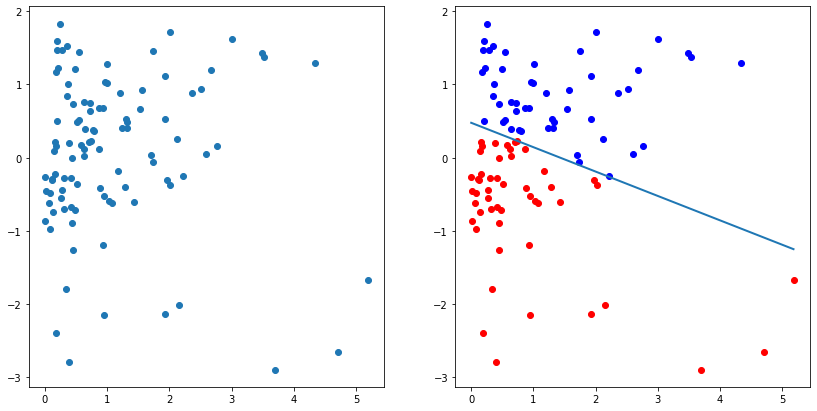

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

# draw n random points

N = 100
x1 = np.random.exponential(size=N)
x2 = np.random.standard_normal(N)
X = np.vstack(zip(np.ones(N),x1, x2))

print("Primeiro x: ", X[0,:])
print("Segundo x : ", X[1,:])

fig = plt.figure(figsize=(14,7))
plt.subplot(121)
plt.plot(X[:,1],X[:,2],'o')

# um vetor de pesos qualquer, que definirá a fronteira de decisão
w = np.array((-1, 0.7, 2.1))

# baseado na fronteira, rotular os dados como positivo ou negativo
# e plotar em azul (poitivos) ou vermelho (negativos)
y = []
plt.subplot(122)
for i in range(N):
    if  X[i,:].dot(w) > 0:
        plt.plot(X[i,1],X[i,2],'bo')  # o (bolinhas) azuis (blue)
        y.append(1)
    else:
        plt.plot(X[i,1],X[i,2],'ro')  # o (bolinhas) vermelhas (red)
        y.append(0)
        
y = np.array(y)

# plotar a fronteira linear
x = np.arange(0, max(X[:,1]), 0.01)
fx = [(-w[0]-w[1]*p)/w[2] for p in x ]
plt.plot(x, fx, lw=2)
plt.show()

### Testar regressão linear

Initial cost:  0.25
Final cost:  0.04601920467060894
w =  [0.31603988 0.13453852 0.36700657]


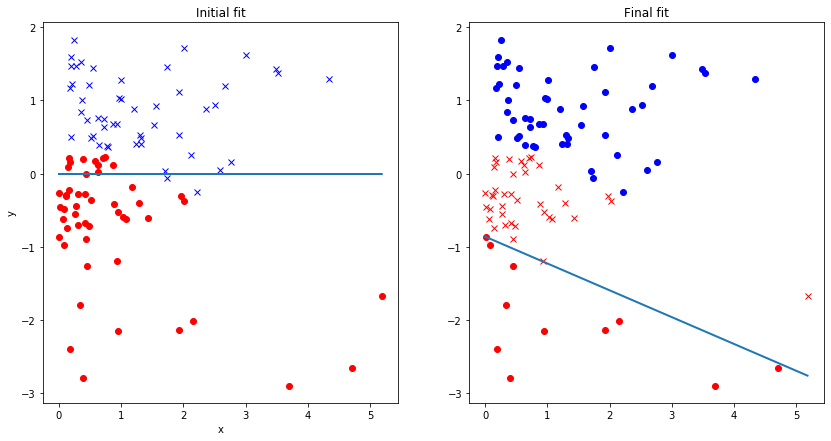

In [3]:
# Supomos que o arquivo funcoes.py já está criado
from funcoes import gradientDescent, computeCost


# chutar uns pesos iniciais e calcular o custo inicial
w = np.zeros(3)

initialCost = computeCost(X, y, w)
print('Initial cost: ', initialCost)
R = X.dot(w)

# plotar a fronteira inicial
fig = plt.figure(figsize=(14,7))
plt.subplot(121)
plt.title('Initial fit')
for i in range(N):
    if  y[i]>0 :
        if R[i]>0:
            plt.plot(X[i,1],X[i,2],'bo')  # positivas corretas
        else:
            plt.plot(X[i,1],X[i,2],'bx')  # positivas erradas
    else:
        if R[i]>0:
            plt.plot(X[i,1],X[i,2],'rx')  # negativas erradas
        else:
            plt.plot(X[i,1],X[i,2],'ro')  # negativas corretas

plt.plot(X[:,1], X.dot(w), '-')
plt.xlabel('x')
plt.ylabel('y')


# Some gradient descent settings
iterations = 500
alpha = 0.01

# run gradient descent
w, J_history = gradientDescent(X, y, w, alpha, iterations)

finalCost = computeCost(X, y, w)
print('Final cost: ', finalCost)
print('w = ', w)

# solução matricial 
#XT = np.transpose(X)
#MP = np.linalg.inv(XT.dot(X))
#w = TMP.dot(XT.dot(y))

R = X.dot(w)

# plot a fronteira final
plt.subplot(122)
plt.title('Final fit')

for i in range(N):
    if  y[i]>0 :
        if R[i]>0:
            plt.plot(X[i,1],X[i,2],'bo')  # positivas corretas
        else:
            plt.plot(X[i,1],X[i,2],'bx')  # positivas erradas
    else:
        if R[i]>0:
            plt.plot(X[i,1],X[i,2],'rx')  # negativas erradas
        else:
            plt.plot(X[i,1],X[i,2],'ro')  # negativas corretas
        
x = np.arange(0, max(X[:,1]), 0.01)
fx = [(-w[0]-w[1]*p)/w[2] for p in x ]
plt.plot(x, fx, lw=2)
plt.show()

### Testar regressão logística

Initial cost:  0.125
Final cost:  0.024861184547552612
w =  [-0.96022246  0.73950394  2.94109133]


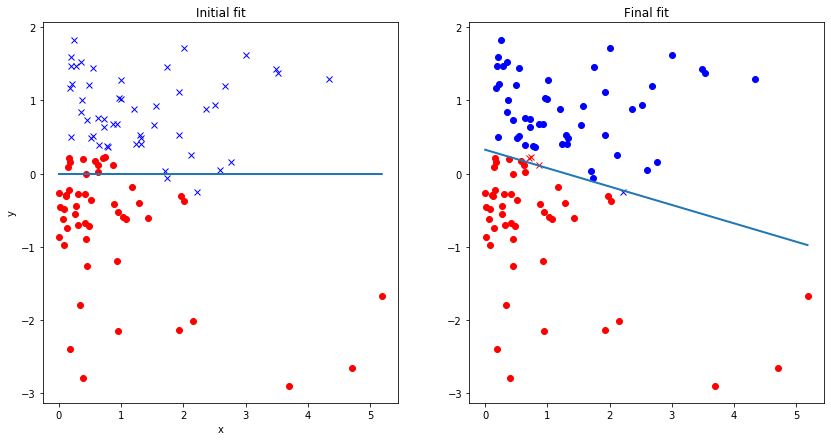

In [5]:
from funcoes import sigmoid, gradientDescent2, computeCost2

# chutar uns pesos iniciais e calcular o custo inicial
w = np.zeros(3)
initialCost = computeCost2(X, y, w)
print('Initial cost: ', initialCost)

R = X.dot(w)

# plotar a fronteira inicial
fig = plt.figure(figsize=(14,7))
plt.subplot(121)
plt.title('Initial fit')
for i in range(N):
    if  y[i]>0 :
        if R[i]>0:
            plt.plot(X[i,1],X[i,2],'bo')  # positivas corretas
        else:
            plt.plot(X[i,1],X[i,2],'bx')  # positivas erradas
    else:
        if R[i]>0:
            plt.plot(X[i,1],X[i,2],'rx')  # negativas erradas
        else:
            plt.plot(X[i,1],X[i,2],'ro')  # negativas corretas

plt.plot(X[:,1], X.dot(w), '-')
plt.xlabel('x')
plt.ylabel('y')

# Some gradient descent settings
iterations = 3000
alpha = 0.01

# run gradient descent
w, J_history = gradientDescent2(X, y, w, alpha, iterations)

finalCost = computeCost2(X, y, w)
print('Final cost: ', finalCost)
print("w = ", w)

R = X.dot(w)

plt.subplot(122)
plt.title("Final fit")
R = X.dot(w)
for i in range(N):
    if  y[i]>0 :
        if R[i]>0:
            plt.plot(X[i,1],X[i,2],'bo')  # positivas corretas
        else:
            plt.plot(X[i,1],X[i,2],'bx')  # positivas erradas
    else:
        if R[i]>0:
            plt.plot(X[i,1],X[i,2],'rx')  # negativas erradas
        else:
            plt.plot(X[i,1],X[i,2],'ro')  # negativas corretas
        
x = np.arange(0, max(X[:,1]), 0.01)
fx = [(-w[0]-w[1]*p)/w[2] for p in x ]
plt.plot(x, fx, lw=2)
plt.show()